In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

In [2]:
# getting a list of US cities available from OpenAQ
cities = requests.get('https://api.openaq.org/v1/cities?country=US&limit=1000')
print(cities.status_code)


200


From this list, we find that the areas of interest (in the Bay Area) are 'San Francisco-Oakland-Fremont', 'San Jose-Sunnyvale-Santa Clara', 'Vallejo-Fairfield', 'Napa', and 'Sonoma'.

In [3]:
# we next need to find out which 'locations' are included in each of these broader areas

areas_of_interest = [
    'San Francisco-Oakland-Fremont',
    'San Jose-Sunnyvale-Santa Clara',
    'Vallejo-Fairfield',
    'Napa',
    'Sonoma'
]

bay_area_locations = []

# getting info for each area and adding the locations that it contains to a list
for area in areas_of_interest:
    parameters = { 'city[]': area }
    response = requests.get('https://api.openaq.org/v1/locations', parameters)
    
    for result in response.json()['results']:
        bay_area_locations.append(result['location'])


In [62]:
bay_area_locations

['Berkeley Aquatic Par',
 'Bethel Island',
 'Concord',
 'Hayward',
 'Laney College',
 'Livermore - Rincon',
 'Oakland',
 'Oakland West',
 'Patterson Pass',
 'Pleasanton - Owens C',
 'Redwood City',
 'Richmond - 7th St',
 'San Francisco',
 'San Pablo - Rumrill',
 'San Rafael',
 'San Ramon',
 'Gilory - 9th Street',
 'Hollister AMS',
 'Hollister AMS',
 'Los Gatos',
 'Pinnacles NM',
 'San Jose - Jackson S',
 'San Jose - Knox Ave',
 'San Martin',
 'Fairfield',
 'Rio Vista',
 'Rio Vista',
 'Vacaville',
 'Vallejo',
 'Napa - Jefferson St',
 'Napa - Napa Valley C',
 'Sonoma Technology Mo']

In [4]:
# getting a sense of what the data for each location will look like... 
# testing the process on data for Alameda/Berkeley Aquatic Par location
# focusing on PM2.5 because that's the main pollutant used to gauge wildfires' effects on air quality

test_params = {
    'city': 'ALAMEDA',
    'location': 'Berkeley Aquatic Par',
    'parameter': 'pm25',
    'date_from': '2020-01-01',
    'limit': 10
}

alameda_resp = requests.get('https://api.openaq.org/v1/measurements', test_params)
print(alameda_resp.status_code)

200


In [5]:
alameda_resp.json()

{'meta': {'name': 'openaq-api',
  'license': 'CC BY 4.0',
  'website': 'https://docs.openaq.org/',
  'page': 1,
  'limit': 10,
  'found': 6439},
 'results': [{'location': 'Berkeley Aquatic Par',
   'parameter': 'pm25',
   'date': {'utc': '2020-12-02T15:00:00Z',
    'local': '2020-12-02T07:00:00-08:00'},
   'value': 16,
   'unit': 'µg/m³',
   'coordinates': {'latitude': 37.864767, 'longitude': -122.302741},
   'country': 'US',
   'city': 'ALAMEDA'},
  {'location': 'Berkeley Aquatic Par',
   'parameter': 'pm25',
   'date': {'utc': '2020-12-02T14:00:00Z',
    'local': '2020-12-02T06:00:00-08:00'},
   'value': 8,
   'unit': 'µg/m³',
   'coordinates': {'latitude': 37.864767, 'longitude': -122.302741},
   'country': 'US',
   'city': 'ALAMEDA'},
  {'location': 'Berkeley Aquatic Par',
   'parameter': 'pm25',
   'date': {'utc': '2020-12-02T13:00:00Z',
    'local': '2020-12-02T05:00:00-08:00'},
   'value': 9,
   'unit': 'µg/m³',
   'coordinates': {'latitude': 37.864767, 'longitude': -122.302741}

In [6]:
#turning the alameda_resp dictionary into a df

alameda_df = pd.DataFrame.from_dict(alameda_resp.json()['results'])
alameda_df.head()

,city,coordinates,country,date,location,parameter,unit,value
0,ALAMEDA,"{'latitude': 37.864767, 'longitude': -122.302741}",US,"{'utc': '2020-12-02T15:00:00Z', 'local': '2020...",Berkeley Aquatic Par,pm25,µg/m³,16
1,ALAMEDA,"{'latitude': 37.864767, 'longitude': -122.302741}",US,"{'utc': '2020-12-02T14:00:00Z', 'local': '2020...",Berkeley Aquatic Par,pm25,µg/m³,8
2,ALAMEDA,"{'latitude': 37.864767, 'longitude': -122.302741}",US,"{'utc': '2020-12-02T13:00:00Z', 'local': '2020...",Berkeley Aquatic Par,pm25,µg/m³,9
3,ALAMEDA,"{'latitude': 37.864767, 'longitude': -122.302741}",US,"{'utc': '2020-12-02T07:00:00Z', 'local': '2020...",Berkeley Aquatic Par,pm25,µg/m³,14
4,ALAMEDA,"{'latitude': 37.864767, 'longitude': -122.302741}",US,"{'utc': '2020-12-02T06:00:00Z', 'local': '2020...",Berkeley Aquatic Par,pm25,µg/m³,20


In [7]:
# get json of all PM2.5 data for the locations of interest; convert to df and combine into one df (pm25_df)
# print the number of records found for PM2.5 measurements in 2020 for each location

pm25_df = pd.DataFrame(columns=['city', 'coordinates', 'country', 'date', 'location', 'parameter', 'unit', 'value'])

for location in bay_area_locations:
    loc_params = {
        'location': location,
        'parameter': 'pm25',
        'limit': 10000,
        'date_from': '2020-01-01'
    }
    
    loc_resp = requests.get('https://api.openaq.org/v1/measurements', loc_params)
    
    print(location, ':', loc_resp.json()['meta']['found'])
    
    loc_df = pd.DataFrame.from_dict(loc_resp.json()['results'])
    
    pm25_df = pd.concat([pm25_df, loc_df])


Berkeley Aquatic Par : 6439
Bethel Island : 0
Concord : 6614
Hayward : 0
Laney College : 6815
Livermore - Rincon : 6841
Oakland : 6789
Oakland West : 6313
Patterson Pass : 0
Pleasanton - Owens C : 6658
Redwood City : 6645
Richmond - 7th St : 0
San Francisco : 6461
San Pablo - Rumrill : 6458
San Rafael : 6648
San Ramon : 0
Gilory - 9th Street : 6478
Hollister AMS : 2157
Hollister AMS : 2157
Los Gatos : 0
Pinnacles NM : 0
San Jose - Jackson S : 6640
San Jose - Knox Ave : 6676
San Martin : 0
Fairfield : 0
Rio Vista : 5491
Rio Vista : 5491
Vacaville : 6566
Vallejo : 6694
Napa - Jefferson St : 0
Napa - Napa Valley C : 6476
Sonoma Technology Mo : 0


In [8]:
pm25_df.head(10)

,city,coordinates,country,date,location,parameter,unit,value
0,ALAMEDA,"{'latitude': 37.864767, 'longitude': -122.302741}",US,"{'utc': '2020-12-02T15:00:00Z', 'local': '2020...",Berkeley Aquatic Par,pm25,µg/m³,16
1,ALAMEDA,"{'latitude': 37.864767, 'longitude': -122.302741}",US,"{'utc': '2020-12-02T14:00:00Z', 'local': '2020...",Berkeley Aquatic Par,pm25,µg/m³,8
2,ALAMEDA,"{'latitude': 37.864767, 'longitude': -122.302741}",US,"{'utc': '2020-12-02T13:00:00Z', 'local': '2020...",Berkeley Aquatic Par,pm25,µg/m³,9
3,ALAMEDA,"{'latitude': 37.864767, 'longitude': -122.302741}",US,"{'utc': '2020-12-02T07:00:00Z', 'local': '2020...",Berkeley Aquatic Par,pm25,µg/m³,14
4,ALAMEDA,"{'latitude': 37.864767, 'longitude': -122.302741}",US,"{'utc': '2020-12-02T06:00:00Z', 'local': '2020...",Berkeley Aquatic Par,pm25,µg/m³,20
5,ALAMEDA,"{'latitude': 37.864767, 'longitude': -122.302741}",US,"{'utc': '2020-12-02T05:00:00Z', 'local': '2020...",Berkeley Aquatic Par,pm25,µg/m³,26
6,ALAMEDA,"{'latitude': 37.864767, 'longitude': -122.302741}",US,"{'utc': '2020-12-02T04:00:00Z', 'local': '2020...",Berkeley Aquatic Par,pm25,µg/m³,20
7,ALAMEDA,"{'latitude': 37.864767, 'longitude': -122.302741}",US,"{'utc': '2020-12-02T03:00:00Z', 'local': '2020...",Berkeley Aquatic Par,pm25,µg/m³,18
8,ALAMEDA,"{'latitude': 37.864767, 'longitude': -122.302741}",US,"{'utc': '2020-12-02T02:00:00Z', 'local': '2020...",Berkeley Aquatic Par,pm25,µg/m³,10
9,ALAMEDA,"{'latitude': 37.864767, 'longitude': -122.302741}",US,"{'utc': '2020-12-02T01:00:00Z', 'local': '2020...",Berkeley Aquatic Par,pm25,µg/m³,11


In [10]:
pm25_df.reset_index(inplace=True)
pm25_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127507 entries, 0 to 127506
Data columns (total 10 columns):
level_0        127507 non-null int64
index          127507 non-null int64
city           127507 non-null object
coordinates    127507 non-null object
country        127507 non-null object
date           127507 non-null object
location       127507 non-null object
parameter      127507 non-null object
unit           127507 non-null object
value          127507 non-null object
dtypes: int64(2), object(8)
memory usage: 9.7+ MB


This df encompasses the PM2.5 measurements for all of our locations of interest for 2020 (up to the present date). There are around 127,000 rows, so it is reasonable to assume that each year's data will be on the same order of magnitude. OpenAQ provides two years of data via their open API, so we will use the same process as above to acquire the previous two years' data. For data prior to that, we will need to query their S3 buckets, which can be done through a distributed query tool like Amazon Athena, Apache Spark, or Google BigQuery.

In [98]:
pm25_df.isnull().any()

index          False
city           False
coordinates    False
country        False
date           False
location       False
parameter      False
unit           False
value          False
dtype: bool

For the 2020 PM2.5 data, there are no null values.

In [11]:
# we see that the dates are given in a dict, with values for UTC and local time
# NOTE: the date_from field in the API uses UTC, so we will need to make sure that we standardize our time references...

pm25_df['date'][0]

{'utc': '2020-12-02T15:00:00Z', 'local': '2020-12-02T07:00:00-08:00'}

In [12]:
# pulling out the times into their own df for easier handling

df_times = pd.DataFrame(pm25_df['date'].values.tolist(), index=pm25_df.index)

In [13]:
# adding the local times back into the main pm25_df and converting to datetime format

pm25_df['local_datetime'] = pd.to_datetime(df_times['local'])
pm25_df.head(10)

,level_0,index,city,coordinates,country,date,location,parameter,unit,value,local_datetime
0,0,0,ALAMEDA,"{'latitude': 37.864767, 'longitude': -122.302741}",US,"{'utc': '2020-12-02T15:00:00Z', 'local': '2020...",Berkeley Aquatic Par,pm25,µg/m³,16,2020-12-02 15:00:00
1,1,1,ALAMEDA,"{'latitude': 37.864767, 'longitude': -122.302741}",US,"{'utc': '2020-12-02T14:00:00Z', 'local': '2020...",Berkeley Aquatic Par,pm25,µg/m³,8,2020-12-02 14:00:00
2,2,2,ALAMEDA,"{'latitude': 37.864767, 'longitude': -122.302741}",US,"{'utc': '2020-12-02T13:00:00Z', 'local': '2020...",Berkeley Aquatic Par,pm25,µg/m³,9,2020-12-02 13:00:00
3,3,3,ALAMEDA,"{'latitude': 37.864767, 'longitude': -122.302741}",US,"{'utc': '2020-12-02T07:00:00Z', 'local': '2020...",Berkeley Aquatic Par,pm25,µg/m³,14,2020-12-02 07:00:00
4,4,4,ALAMEDA,"{'latitude': 37.864767, 'longitude': -122.302741}",US,"{'utc': '2020-12-02T06:00:00Z', 'local': '2020...",Berkeley Aquatic Par,pm25,µg/m³,20,2020-12-02 06:00:00
5,5,5,ALAMEDA,"{'latitude': 37.864767, 'longitude': -122.302741}",US,"{'utc': '2020-12-02T05:00:00Z', 'local': '2020...",Berkeley Aquatic Par,pm25,µg/m³,26,2020-12-02 05:00:00
6,6,6,ALAMEDA,"{'latitude': 37.864767, 'longitude': -122.302741}",US,"{'utc': '2020-12-02T04:00:00Z', 'local': '2020...",Berkeley Aquatic Par,pm25,µg/m³,20,2020-12-02 04:00:00
7,7,7,ALAMEDA,"{'latitude': 37.864767, 'longitude': -122.302741}",US,"{'utc': '2020-12-02T03:00:00Z', 'local': '2020...",Berkeley Aquatic Par,pm25,µg/m³,18,2020-12-02 03:00:00
8,8,8,ALAMEDA,"{'latitude': 37.864767, 'longitude': -122.302741}",US,"{'utc': '2020-12-02T02:00:00Z', 'local': '2020...",Berkeley Aquatic Par,pm25,µg/m³,10,2020-12-02 02:00:00
9,9,9,ALAMEDA,"{'latitude': 37.864767, 'longitude': -122.302741}",US,"{'utc': '2020-12-02T01:00:00Z', 'local': '2020...",Berkeley Aquatic Par,pm25,µg/m³,11,2020-12-02 01:00:00


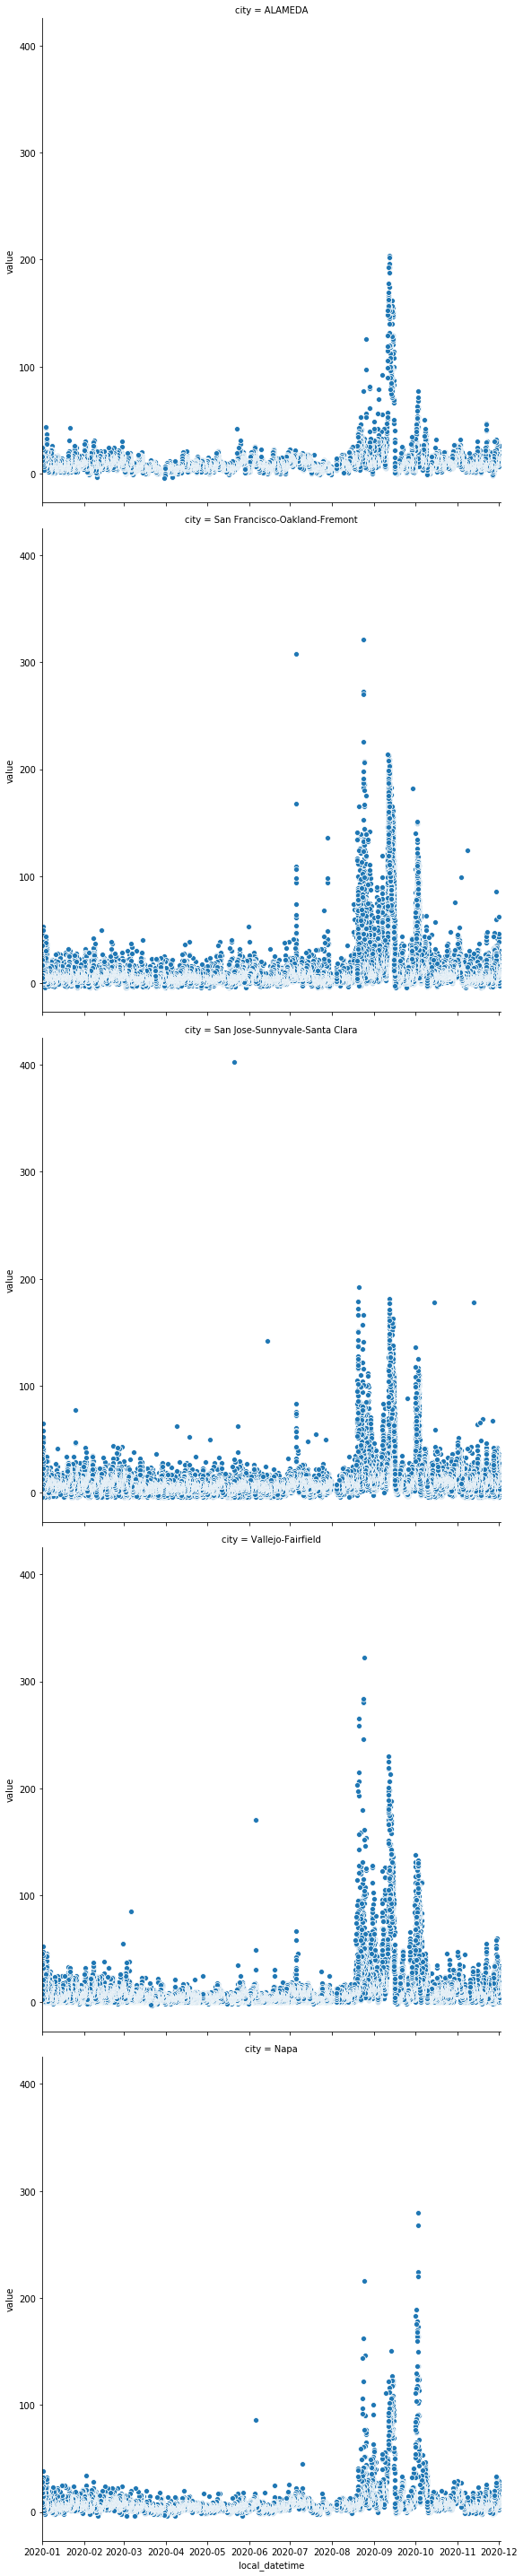

In [21]:
# plotting PM2.5 values for each "city" location over time

g = sns.FacetGrid(pm25_df, row='city', height=8)
g.map(sns.scatterplot, 'local_datetime', 'value')
g.set(xlim=(pm25_df['local_datetime'].min(),pm25_df['local_datetime'].max()))

These plots show roughly the expected distributions of PM2.5 values over time. Before the fire season started, PM2.5 values hovered between approx. 0 and 50 µg/m³; during the worst of the fire season (Aug-Oct), values spiked to the 100s of µg/m³ or more. 

Some notable observations from these charts include:
<ul><li>Lower values in general for Alameda than the other locations, especially later in the fire season</li>
    <li>A few extremely high values in the 300-400 range for SF, San Jose, and Vallejo regions</li>
    <li>Three distinct spikes in PM2.5 values around late August, early/mid Sept, and early Oct</li>
    <li>There seem to be some negative PM2.5 values</li>
    
Based on these observations, we will want to graph these data alongside the fire incidents data to see which fires the spikes in PM2.5 values are correlated with, and where those fires were located. 

We will also need to investigate the negative PM2.5 values, since values below 0 are not physically possible. According to the EPA, negative values are sometimes caused when the true values is approaching 0 µg/m³ and there is noise in the measurement. The AQS database allows negative values up to -10 µg/m³, while AirNow flags any value below -4.99 µg/m³. Based on these facts, we will be especially concerned with values below -5 µg/m³.